# Calibration and Apriltag Measurement Testing

## Imports

In [1]:
import sys
import time
import matplotlib.pyplot as plt
import cv2
import math

import delivery_driver as dd

sys.path.append("../../deliveryrobot")
from utilities.utilities import *
from sensors.camera.apriltagsensor import *
from sensors.calibration.camera_calibration import *

## Camera Initialization

In [2]:
robot = dd.DeliveryRobot()
sensor = AprilTagSensor(cal_dir)

AprilTag sensor setup COMPLETE


## Get Measurement

In [3]:
measy = []

In [4]:
actual_measurements = [0.30, 0.20, 0.10, 0, -0.10, -0.20, -0.30]

In [9]:
count = 0

april_img = robot.take_picture(image_dir + "/testing/apriltagsensor_test/")
measurements={}
sensor.detect(april_img, measurements)
print(f"{measurements['1'][0]}\t{measurements['1'][1]}\t{measurements['1'][2]}")
measy.append(measurements['1'][1])

Pose [[ 0.97199897 -0.01642288  0.23441051 -0.00963732]
 [ 0.01951145  0.99975062 -0.01086268 -0.00458481]
 [-0.23417366  0.0151322   0.97207701  0.0945302 ]
 [ 0.          0.          0.          1.        ]]
0.9453020076211966	0.0023731930740943097	-0.23636850664750586


In [6]:
measy = [0.39661405816005646, 0.28730848629079925, 0.19410041547150547, 0.09554904458705298, -0.0033251136946273697, -0.10577673671968221, -0.2050130837024946]

[0.39661405816005646, 0.28730848629079925, 0.19410041547150547, 0.09554904458705298, -0.0033251136946273697, -0.10577673671968221, -0.2050130837024946]


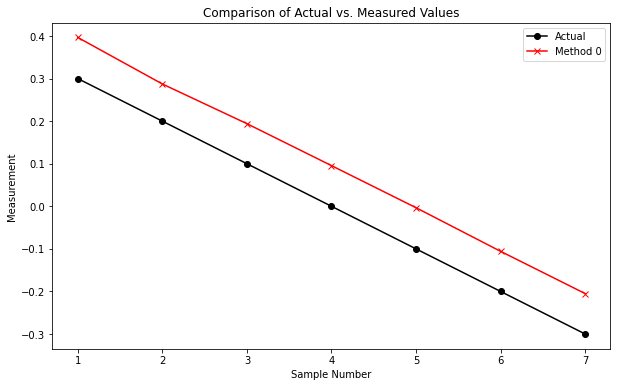

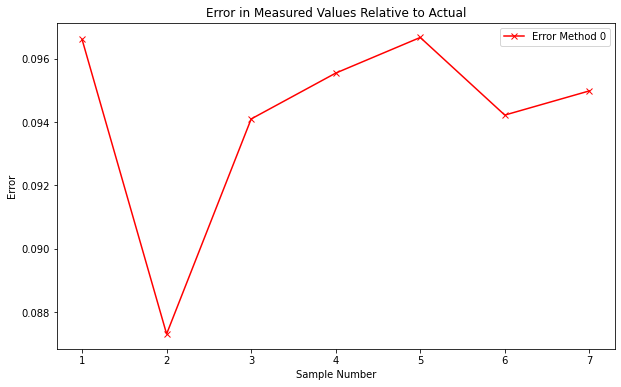

In [7]:
print(measy)

# Calculate errors relative to the actual measurements
error_measy = [abs(m0 - actual) for m0, actual in zip(measy, actual_measurements)]

# Plot actual measurements and the three sets of measurements
plt.figure(figsize=(10, 6))

sample_numbers = list(range(1, 8))  # Samples 1 through 7

# Plot actual values
plt.plot(sample_numbers, actual_measurements, label='Actual', marker='o', color='black')

# Plot method 1 measurements
plt.plot(sample_numbers, measy, label='Method 0', marker='x', color='red')

# Add labels and legend
plt.xlabel('Sample Number')
plt.ylabel('Measurement')
plt.title('Comparison of Actual vs. Measured Values')
plt.legend()

# Show the plot
plt.show()

# Optional: If you also want to plot the errors, here’s how:
plt.figure(figsize=(10, 6))
plt.plot(sample_numbers, error_measy, label='Error Method 0', marker='x', color='red')

plt.xlabel('Sample Number')
plt.ylabel('Error')
plt.title('Error in Measured Values Relative to Actual')
plt.legend()

plt.show()